In [1]:
from ipynb.fs.full.GeneticFunctions import sine, exponentialsine
from ipynb.fs.full.Population import Population
from ipynb.fs.full.Simulation import Simulation
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy import signal
from IPython.display import clear_output

In [2]:
def calculate_fitness(agent):
    x, y = agent[0], agent[1]
    return np.sin(x/100) * np.sin(y/100) * 1.5 ** (x/250) * 1.5 ** (y/250)

def view_pop(pop):
    x = np.arange(0,1000,1)
    y = np.arange(0,1000,1)
    X,Y = np.meshgrid(x,y)
    z = np.sin(X/100) * np.sin(Y/100) * 1.5 ** (X/250) * 1.5 ** (Y/250)

    fig, ax = plt.subplots(1,1,figsize=(8, 8))
    ax.imshow(z, cmap='plasma')
    ax.axis('off')
    ax.scatter(pop.agents[:,0], pop.agents[:,1], s=5, color='black', alpha=0.5)
    return fig

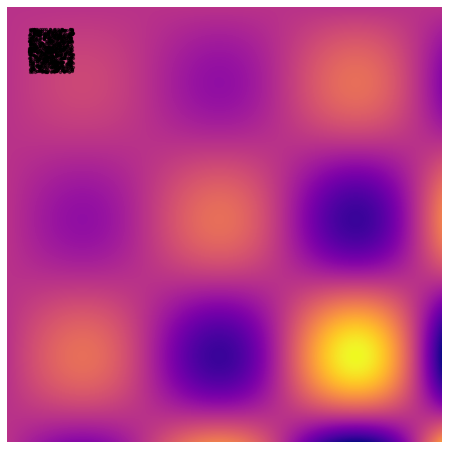

In [38]:
sim = Simulation(calculate_fitness)
testPop = Population(agent_length=2, num_agents=1000, bounds=(0,1000), num_genes=2, starting_bounds=(50,150))
testPop.define_visualization_function(view_pop)
testPop.display()

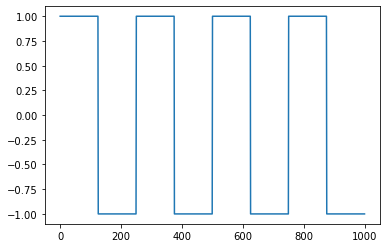

In [39]:
n_epochs = 1000
period = 250
Unique_max = 1.0
Mutation_max = 1.0
x = np.arange(0, n_epochs, 1)
uniqueness_value = signal.square(2 * np.pi * x / period, duty=0.5) * Unique_max
mutation_values = signal.square(2 * np.pi * x / period, duty=0.5) * Mutation_max
fig, ax = plt.subplots(1,1,figsize=(6,4))
ax.plot(x, uniqueness_value)

In [40]:
testPop.reset()

In [41]:
for i in range(n_epochs):
    gen_mutation_rate = 1 #sine(i, period=125, max=0.01, offset = -25)
    #uniqueness_value = exponentialsine(i, period=250, exponent=4, max=1.25, offset = 100)
    
    nextGen, fitness, diversity = sim.next_generation(testPop, mutation_rate=gen_mutation_rate, value_diversity = uniqueness_value[i], show_fitness = True, show_diversity = True)
    testPop.next_generation(nextGen, fitness, diversity)
    testPop.save_img(str(i).zfill(5))
    
    clear_output(wait=True)
    if i%10 == 0:
        print(f'{i}/{n_epochs} completed:\t|{"="*round(40 * i/n_epochs)}|{"-" * round(40 * (n_epochs-i)/n_epochs)}')
    
    #save_n_agents_img(current_generation, i)
print('Completed!')

Completed!


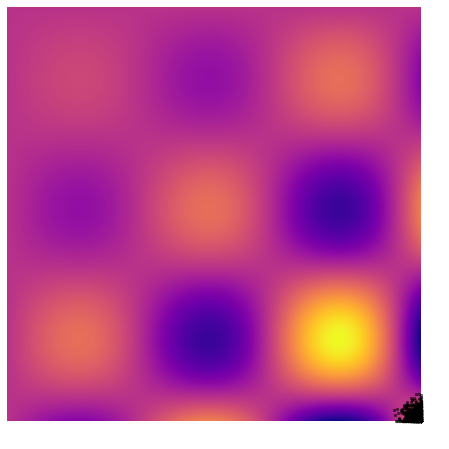

In [42]:
testPop.display()

Text(0.5, 1.0, 'Genetic Diversity')

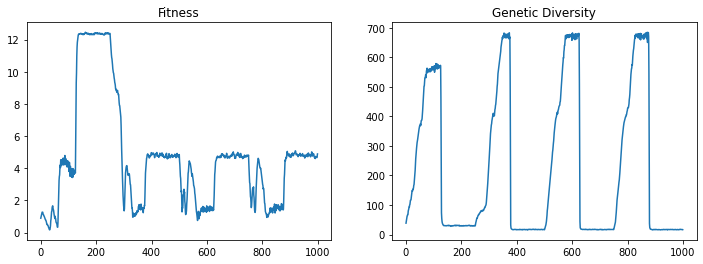

In [43]:
fig, ax = plt.subplots(1,2,figsize=(12,4))
ax[0].plot(np.arange(0, len(testPop.fitness_history)), testPop.fitness_history)
ax[0].set_title('Fitness')
ax[1].plot(np.arange(0, len(testPop.diversity_history)), testPop.diversity_history)
ax[1].set_title('Genetic Diversity')
#print(f'Final diversity score: {testPop.diversity_history[-1]}')

In [44]:
import cv2
import os

In [45]:
image_folder = './Output'
video_name = 'Output.mp4'

images = [img for img in os.listdir(image_folder)]
images.remove('.ipynb_checkpoints')

frame = cv2.imread(os.path.join(image_folder, images[0]))
height, width, layers = frame.shape

video = cv2.VideoWriter(video_name, 0, 60, (width,height))

for image in images:
    video.write(cv2.imread(os.path.join(image_folder, image)))

cv2.destroyAllWindows()
video.release()

print(f'Finished converting {len(images)} images into video')

Finished converting 1000 images into video


'.ipynb_checkpoints'